In [1]:
#0000002_00005_d_0000014

In [2]:
# ann1 = pd.read_csv('0000002_00005_d_0000014.txt',names=['x','y','w','h','ig','cat','t','o'],delimiter=',')
# daftar = ann1.values.tolist()

In [3]:
# ann1

In [4]:
# img = cv2.imread('0000002_00005_d_0000014.jpg')
# display_img(img)

In [5]:
# # cv2.circle(img, (265,70), 5, (0,0,255), 4)
# cv2.rectangle(img, (406, 119), (406+265,119+70), (255,0,0), 2)
# display_img(img)

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
from pandas import DataFrame
from collections import Counter
import networkx as nx
import os

In [2]:
def display_img(img,cmap=None):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap)

In [3]:
def tengah(x,y,w,h):
    xbaru = int(x+(w/2))
    ybaru = int(y+(h/2))
    return xbaru,ybaru

In [4]:
def jarak(point1,point2):
    dist = np.linalg.norm(point1 - point2)
    return(dist)

In [161]:
def jadi(namacsv,wid):
    namacsv = './Newfolder/VisDrone2019-DET-train/' + namacsv
    ann1 = pd.read_csv(namacsv,names=['x','y','w','h','ig','cat','t','o'],delimiter=',')
    daftar = ann1.values.tolist()
    ar=[]
    for i in daftar:
        if i[5] == 1 or i[5] == 2:
            x,y = tengah(i[0],i[1],i[2],i[3])
            ar.append([x,y])
    ar = np.asarray(ar)
    gf = nx.Graph()
    xy = {}

    for i in range(0,len(ar)):
        gf.add_node(i)
        xy[i] = (ar[i][0],-(ar[i][1]))

    for i in range(0,len(ar)):
        for j in range(i+1,len(ar)):
            if jarak(ar[i],ar[j])<wid:
                gf.add_edge(i,j)
    
    if nx.is_empty(gf) or nx.number_of_nodes(gf) == 0:
        return 0
    count = nx.number_of_nodes(gf)
#     nx.draw(gf,pos=xy,node_size=50)
    cc = nx.average_clustering(gf,count_zeros=True)
#     return cc, count
    if cc > 0.35 and count>12:
        hasilnya = 1
    else:
        hasilnya = 0
    
    return hasilnya

In [163]:
directory = os.fsencode('Newfolder/VisDrone2019-DET-train/')

for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".txt"):
        nama=filename[:-4]
        namaimg = nama + '.jpg'
        nimg = 'Newfolder/VisDrone2019-DET-train/' + namaimg
        img = cv2.imread(nimg)
#         print(nimg)
        wid = img.shape[1]
        wid = wid/10
        hasilnya = jadi(filename, wid)
        
        if hasilnya==1:
            namapath='Newfolder/hasil/crowd/' + namaimg
#             cv2.imwrite(namapath, img)
            os.rename("Newfolder/VisDrone2019-DET-train/" + namaimg, namapath)
        else:
            namapath='Newfolder/hasil/noncrowd/' + namaimg
#             cv2.imwrite(namapath, img)
            os.rename("Newfolder/VisDrone2019-DET-train/" + namaimg, namapath)

In [146]:
ann1 = pd.read_csv('./Newfolder/0000003_00231_d_0000016.txt',names=['x','y','w','h','ig','cat','t','o'],delimiter=',')
# ann1

In [147]:
daftar = ann1.values.tolist()
# daftar

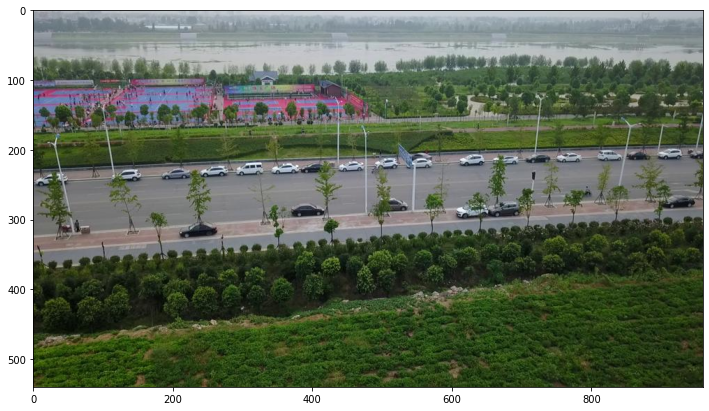

In [148]:
img = cv2.imread('./Newfolder/0000003_00231_d_0000016.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
display_img(img)

In [149]:
ar=[]
for i in daftar:
    if i[5] == 1 or i[5] == 2:
#         cv2.rectangle(img, (i[0], i[1]), (i[0]+i[2],i[1]+i[3]), (255,0,0), 2)
        x,y = tengah(i[0],i[1],i[2],i[3])
#         cv2.circle(img, (x,y), 5, (0,0,255), -1)
        ar.append([x,y])
ar = np.asarray(ar)
# ar

In [150]:
for i in daftar:
    if i[5] == 1 or i[5] == 2:
#         cv2.rectangle(img, (i[0], i[1]), (i[0]+i[2],i[1]+i[3]), (255,0,0), 2)
        x,y = tengah(i[0],i[1],i[2],i[3])
        cv2.circle(img, (x,y), 3, (0,0,255), -1)

In [151]:
wid = (img.shape[1])
wid = wid/10
for i in range(0,len(ar)):
    for j in range(i+1,len(ar)):
        if jarak(ar[i],ar[j])<wid:
#             plt.plot(ar[i], ar[j], color="blue", linewidth=1)
            a=ar[i][0]
            b=ar[i][1]
            c=ar[j][0]
            d=ar[j][1]
            cv2.line(img, (a,b), (c,d), (0, 0, 255), 1)

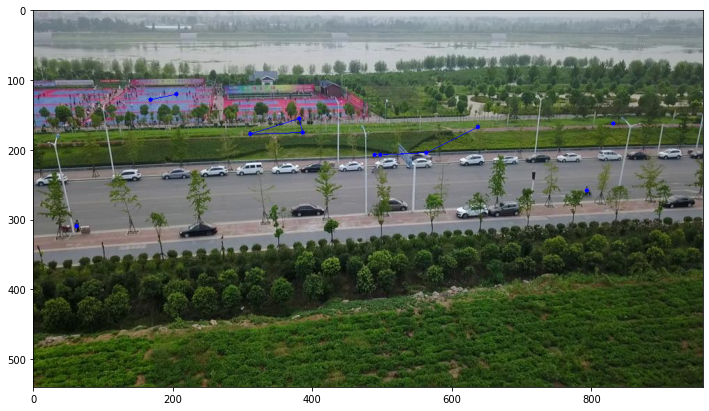

In [152]:
display_img(img)

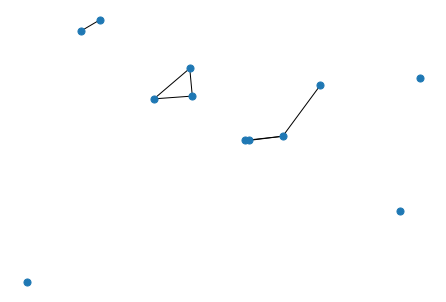

In [153]:
gf = nx.Graph()
xy = {}
wid = (img.shape[1])
wid = wid/10

for i in range(0,len(ar)):
#     print(i,ar[i][0],ar[i][1])
#     gf.add_node(i, pos=(ar[i][0],ar[i][1]))
    gf.add_node(i)
    xy[i] = (ar[i][0],-(ar[i][1]))

# print(xy)

for i in range(0,len(ar)):
    for j in range(i+1,len(ar)):
        if jarak(ar[i],ar[j])<wid:
            gf.add_edge(i,j)

nx.draw(gf,pos=xy,node_size=50)
plt.show()

In [154]:
print(nx.average_clustering(gf,count_zeros=True))
# print(nx.density(gf))

0.4444444444444445


In [129]:
clus=nx.clustering(gf)
res = sum(clus.values()) / len(clus)
res

0.4444444444444445

In [131]:
nx.number_of_nodes(gf)

12